<a href="https://colab.research.google.com/github/ruthika11/ipython-notebook-examples/blob/master/Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questions**
**1**.Top 10 maximum burnt area happened on which month.    
Output:
month,area

**2**.Highest temperature and lowest temperature for each month.  
month,highest_temp, lowest_temp

**3**.Monthly when highest wind and lowest wind happened.   
Output:
month,highest_wind, lowest_wind

**4**.Highest and lowest relative humidity for each month.  
Output:
month,highest_rh, lowest_rh

**5**.Join the output from questions 1-4 above.  
Output:
month,area,highest_temp, lowest_temp,highest_wind, lowest_wind,highest_rh, lowest_rh

**6**.Plot a group bar chart for the output in question 5.  
       
X-axis -> Month    
Bar 1 -> highest_temp   
Bar 2 -> highest_wind  
Bar 3 -> highest_rh



In [ ]:
import csv
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive/")
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!ls - ltr /content/drive/MyDrive/

In [5]:
def pretty_print(df,n):
    print(tabulate(df.head(n), headers="keys", tablefmt="psql"))

def mmm_to_index(row):
  dict_mmm_index = {"jan":1, "feb":2 , "mar":3,"apr" :4,"may": 5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
  return dict_mmm_index[str(row["month"])]

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/forestfires.csv")
print(df)

# 1.Top 10 maximum burnt area happened on which month.
Output: month,area

In [7]:
df_max_burnt = df.groupby(['month'])['area'].max().reset_index()
df_10max_burnt = df_max_burnt.sort_values(by = ["area"], ascending = False)
pretty_print(df_10max_burnt,10)

+----+---------+---------+
|    | month   |    area |
|----+---------+---------|
| 11 | sep     | 1090.84 |
|  1 | aug     |  746.28 |
|  5 | jul     |  278.53 |
|  6 | jun     |   70.32 |
|  0 | apr     |   61.13 |
|  3 | feb     |   51.78 |
| 10 | oct     |   49.37 |
|  8 | may     |   38.48 |
|  7 | mar     |   36.85 |
|  2 | dec     |   24.77 |
+----+---------+---------+


# 2.Highest temperature and lowest temperature for each month.
month,highest_temp, lowest_temp

In [8]:
high_low_temp = df.groupby(["month"]).agg({"temp":["max","min"]}).reset_index()
high_low_temp.columns = ["month","highest_temp"," lowest_temp"]
high_low_temp["month_index"] = high_low_temp.apply(mmm_to_index , axis = 1)
high_low_temp = high_low_temp.sort_values(by = "month_index", ascending= True)
pretty_print(high_low_temp,15)

high_low_temp.style.background_gradient(cmap = "YlGnBu").set_properties(**{"font-size" : "15px"})

+----+---------+----------------+----------------+---------------+
|    | month   |   highest_temp |    lowest_temp |   month_index |
|----+---------+----------------+----------------+---------------|
|  4 | jan     |            5.3 |            5.2 |             1 |
|  3 | feb     |           15.7 |            4.2 |             2 |
|  7 | mar     |           18.8 |            5.3 |             3 |
|  0 | apr     |           17.6 |            5.8 |             4 |
|  8 | may     |           18   |           11.3 |             5 |
|  6 | jun     |           28   |           10.6 |             6 |
|  5 | jul     |           30.2 |           12.6 |             7 |
|  1 | aug     |           33.3 |            5.1 |             8 |
| 11 | sep     |           30.2 |            9.8 |             9 |
| 10 | oct     |           21.7 |           11.3 |            10 |
|  9 | nov     |           11.8 |           11.8 |            11 |
|  2 | dec     |            5.1 |            2.2 |            

,month,highest_temp,lowest_temp,month_index
4,jan,5.300000,5.200000,1
3,feb,15.700000,4.200000,2
7,mar,18.800000,5.300000,3
0,apr,17.600000,5.800000,4
8,may,18.000000,11.300000,5
6,jun,28.000000,10.600000,6
5,jul,30.200000,12.600000,7
1,aug,33.300000,5.100000,8
11,sep,30.200000,9.800000,9
10,oct,21.700000,11.300000,10


# 3.Monthly when highest wind and lowest wind happened.
Output: month,highest_wind, lowest_wind

In [9]:
high_low_wind =df.groupby(["month"]).agg({"wind":["max","min"]}).reset_index()
high_low_wind.columns = ["month","highest_wind"," lowest_wind"]
high_low_wind["month_index"] = high_low_wind.apply(mmm_to_index , axis = 1)
high_low_wind = high_low_wind.sort_values(by = "month_index", ascending= True)
pretty_print(high_low_wind,12)


high_low_wind.style.background_gradient(cmap = "Greens").set_properties(**{"font-size" : "15px"})

+----+---------+----------------+----------------+---------------+
|    | month   |   highest_wind |    lowest_wind |   month_index |
|----+---------+----------------+----------------+---------------|
|  4 | jan     |            3.1 |            0.9 |             1 |
|  3 | feb     |            9.4 |            0.9 |             2 |
|  7 | mar     |            9.4 |            0.9 |             3 |
|  0 | apr     |            9.4 |            1.8 |             4 |
|  8 | may     |            4.9 |            4   |             5 |
|  6 | jun     |            9.4 |            1.3 |             6 |
|  5 | jul     |            8   |            0.9 |             7 |
|  1 | aug     |            8.9 |            0.4 |             8 |
| 11 | sep     |            7.6 |            0.9 |             9 |
| 10 | oct     |            5.4 |            0.9 |            10 |
|  9 | nov     |            4.5 |            4.5 |            11 |
|  2 | dec     |            8.5 |            4.9 |            

,month,highest_wind,lowest_wind,month_index
4,jan,3.100000,0.900000,1
3,feb,9.400000,0.900000,2
7,mar,9.400000,0.900000,3
0,apr,9.400000,1.800000,4
8,may,4.900000,4.000000,5
6,jun,9.400000,1.300000,6
5,jul,8.000000,0.900000,7
1,aug,8.900000,0.400000,8
11,sep,7.600000,0.900000,9
10,oct,5.400000,0.900000,10


# 4.Highest and lowest relative humidity for each month.
 Output: month,highest_rh, lowest_rh

In [10]:
high_low_rh =df.groupby(["month"]).agg({"RH":["max","min"]}).reset_index()
high_low_rh.columns = ["month","highest_rh"," lowest_rh"]
high_low_rh["month_index"] = high_low_rh.apply(mmm_to_index , axis = 1)
high_low_rh = high_low_rh.sort_values(by = "month_index", ascending= True)
pretty_print(high_low_rh, 12)

high_low_wind.style.background_gradient(cmap = "Blues").set_properties(**{"font-size" : "15px"})

+----+---------+--------------+--------------+---------------+
|    | month   |   highest_rh |    lowest_rh |   month_index |
|----+---------+--------------+--------------+---------------|
|  4 | jan     |          100 |           78 |             1 |
|  3 | feb     |           82 |           35 |             2 |
|  7 | mar     |           99 |           18 |             3 |
|  0 | apr     |           75 |           20 |             4 |
|  8 | may     |           94 |           40 |             5 |
|  6 | jun     |           90 |           25 |             6 |
|  5 | jul     |           90 |           22 |             7 |
|  1 | aug     |           96 |           19 |             8 |
| 11 | sep     |           86 |           15 |             9 |
| 10 | oct     |           60 |           24 |            10 |
|  9 | nov     |           31 |           31 |            11 |
|  2 | dec     |           61 |           21 |            12 |
+----+---------+--------------+--------------+---------

,month,highest_wind,lowest_wind,month_index
4,jan,3.100000,0.900000,1
3,feb,9.400000,0.900000,2
7,mar,9.400000,0.900000,3
0,apr,9.400000,1.800000,4
8,may,4.900000,4.000000,5
6,jun,9.400000,1.300000,6
5,jul,8.000000,0.900000,7
1,aug,8.900000,0.400000,8
11,sep,7.600000,0.900000,9
10,oct,5.400000,0.900000,10


# 5.Join the output from questions 1-4 above.
Output: month,area,highest_temp, lowest_temp,highest_wind, lowest_wind,highest_rh, lowest_rh

In [14]:
output1 = pd.merge(df_max_burnt,high_low_temp, on = ["month"], how = "inner")
output2 = pd.merge(high_low_wind,high_low_rh , on = ["month","month_index"], how = "inner")
output = pd.merge(output1,output2, on = ["month","month_index"] , how = "inner")
output["month_index"] = output.apply(mmm_to_index , axis = 1)
output = output.sort_values(by = "month_index", ascending= True)
pretty_print(output,12)

output.style.background_gradient(cmap = "YlGnBu").set_properties(**{"font-size" : "15px"})


+----+---------+---------+----------------+----------------+---------------+----------------+----------------+--------------+--------------+
|    | month   |    area |   highest_temp |    lowest_temp |   month_index |   highest_wind |    lowest_wind |   highest_rh |    lowest_rh |
|----+---------+---------+----------------+----------------+---------------+----------------+----------------+--------------+--------------|
|  4 | jan     |    0    |            5.3 |            5.2 |             1 |            3.1 |            0.9 |          100 |           78 |
|  3 | feb     |   51.78 |           15.7 |            4.2 |             2 |            9.4 |            0.9 |           82 |           35 |
|  7 | mar     |   36.85 |           18.8 |            5.3 |             3 |            9.4 |            0.9 |           99 |           18 |
|  0 | apr     |   61.13 |           17.6 |            5.8 |             4 |            9.4 |            1.8 |           75 |           20 |
|  8 | may   

,month,area,highest_temp,lowest_temp,month_index,highest_wind,lowest_wind,highest_rh,lowest_rh
4,jan,0.000000,5.300000,5.200000,1,3.100000,0.900000,100,78
3,feb,51.780000,15.700000,4.200000,2,9.400000,0.900000,82,35
7,mar,36.850000,18.800000,5.300000,3,9.400000,0.900000,99,18
0,apr,61.130000,17.600000,5.800000,4,9.400000,1.800000,75,20
8,may,38.480000,18.000000,11.300000,5,4.900000,4.000000,94,40
6,jun,70.320000,28.000000,10.600000,6,9.400000,1.300000,90,25
5,jul,278.530000,30.200000,12.600000,7,8.000000,0.900000,90,22
1,aug,746.280000,33.300000,5.100000,8,8.900000,0.400000,96,19
11,sep,1090.840000,30.200000,9.800000,9,7.600000,0.900000,86,15
10,oct,49.370000,21.700000,11.300000,10,5.400000,0.900000,60,24


# 6.Plot a group bar chart for the output in question 5.

X-axis -> Month    
Bar 1 -> highest_temp  
Bar 2 -> highest_wind  
Bar 3 -> highest_rh

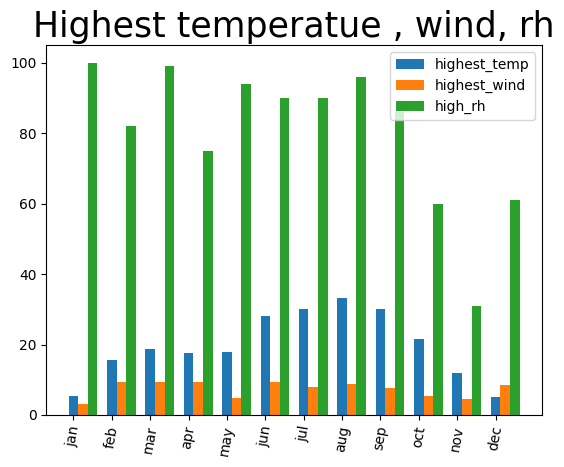

In [54]:
n = 12
high_temp = list(output["highest_temp"])[0:n]
high_wind = list(output["highest_wind"])[0:n]
high_rh = list(output["highest_rh"])[0:n]
mon = list(output["month"])[0:n]
x = np.arange(n)
width = 0.25

plt.title("Highest temperatue , wind, rh",size = 25)
plt.bar(x,high_temp,width,label = "highest_temp")
plt.bar(x + width,high_wind,width,label = "highest_wind")
plt.bar(x + 2*width,high_rh,width,label = "high_rh")

plt.xticks(x,mon, rotation = 80)
plt.legend(loc = "best")
plt.show()